# Çok Değişkenli Aykırı Gözlem Analizi

## Local Outlier Factor (LOF)

Gözlemleri bulundukları konumda yoğunluk tabanlı skorlayarak, buna göre aykırı değer olabilecek değerleri tanımlayabilmemize olanak sağlar.  
  
Bir noktanın local yoğunluğu bu noktanın komşuları ile karşılaştırılır ve eğer bir nokta komşularının yoğunluğundan anlamlı şekilde düşükse bu nokta  
Komşularından daha seyrek bir bölgede bulunmaktadır yorumu yapılabilir.  
  
Dolayısıyla burada bir komşuluk yapısı söz konusudur.  

Bir değerin çevresi yoğun değilse bu noktadaki değer aykırı değerdir.  


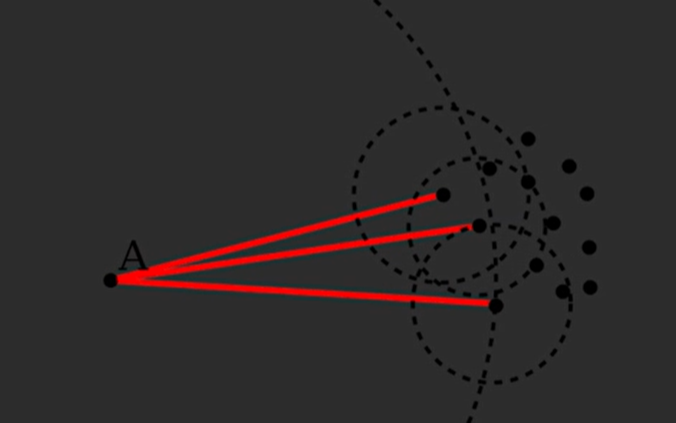

### Peki çok değişkenli aykırı gözlem nedir?  
Yaş ve Evlilik Sayısı şeklinde iki değişken düşünecek olursak,  
İki değişkenin birlikte incelenmesi söz konusudur.  

Örn. Yaşı 17 olan bir kişi evlenemez diyebiliriz.  
Fakat yaşı 18 olan bir kişinin de 3 defa evlenmesinin mümkün olmayacağını da bilmemiz gerekir.    
Bu yüzden iki değişkene aynı anda bakmamız gerekmektedir.



In [1]:
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
diamonds = sns.load_dataset("diamonds")
diamonds = diamonds.select_dtypes(include=['float64', 'int64'])
df = diamonds.copy()
df = df.dropna()
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [3]:
#gerekli import işlemleri

from sklearn.neighbors import LocalOutlierFactor

In [4]:
# n_neightbors = komşu sayısı
# contamination = aykırı değer yoğunluğu

clf = LocalOutlierFactor(n_neighbors = 20, contamination = 0.1)

In [5]:
# Algoritmanın çalıştırılması

clf.fit_predict(df)

array([-1, -1, -1, ...,  1,  1,  1])

In [6]:
# Yukarıda görüleceği üzere ortaya çıkan negatif değerlerin (aykırı değerlerin)
# df_scores değişkenine atanmasıdır

#  1 Normal Değer (TRUE)
# -1 Aykırı Değer (FALSE)

df_scores = clf.negative_outlier_factor_

In [7]:
# İlk 10 aykırı değerin incelenmesi

df_scores[:10]

array([-1.58352526, -1.59732899, -1.62278873, -1.33002541, -1.30712521,
       -1.28408436, -1.28428162, -1.26458706, -1.28422952, -1.27351342])

! Eşik Değer belirlemeden önce ortaya çıkan aykırı değerlerin sıralanması gerekmektedir.  
Aksi halde yanlış ölçüm yapılır

In [8]:
# Değerlerin sıralanması ve eşik değerin seçilmesi

np.sort(df_scores)[ 0:20 ]

array([-8.60430658, -8.20889984, -5.86084355, -4.98415175, -4.81502092,
       -4.81502092, -4.61522833, -4.37081214, -4.29842288, -4.10492387,
       -4.0566648 , -4.01831733, -3.94882806, -3.82378797, -3.80135297,
       -3.75680919, -3.65947378, -3.59249261, -3.55564138, -3.47157375])

LOF yönteminde eşik değeri belirlemek için belirli yöntemler vardır.  
Örn. F1 skoru, hassasiyet vb.   
Fakat burada rastgele seçim yapılarak ilerlenecektir.  
Makine Öğrenmesi bölümünde komşu sayısı ve contamination (yoğunluk) derecesine değinilecektir.

In [9]:
np.sort(df_scores)[13]

-3.823787967755565

In [19]:
# Eşik Değeri Atadık

esik_deger = np.sort(df_scores)[13]

#TRUE olanlar aykırı değer OLMAYANLAR

aykiri_tf = (df_scores > esik_deger)

aykiri_tf

array([ True,  True,  True, ...,  True,  True,  True])

In [20]:
#Aykırı değerlerden temizlenmiş df
# ~ tilda! NOT

filtered_df = df[df_scores > esik_deger]

filtered_df

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74


In [12]:
# Aykırı Değerler 

# Eşik değerin altındaki (negatifler) aykırı değerdir.

df[df_scores < esik_deger]

,carat,depth,table,price,x,y,z
6341,1.00,44.0,53.0,4032,6.31,6.24,4.12
10377,1.09,43.0,54.0,4778,6.53,6.55,4.12
24067,2.00,58.9,57.0,12210,8.09,58.90,8.06
35633,0.29,62.8,44.0,474,4.20,4.24,2.65
36503,0.30,51.0,67.0,945,4.67,4.62,2.37
38840,0.73,70.8,55.0,1049,5.51,5.34,3.84
41918,1.03,78.2,54.0,1262,5.72,5.59,4.42
45688,0.70,71.6,55.0,1696,5.47,5.28,3.85
48410,0.51,61.8,54.7,1970,5.12,5.15,31.80
49189,0.51,61.8,55.0,2075,5.15,31.80,5.12


# Çok Değişkenliler için Baskılama Yöntemi

Baskılama Yönteminde, aykırı değerler alt ve üst uç değerlere eşitlenerek problem çözülür.

In [24]:
# Aykırı Gözlemlere buradaki eşik değeri atayabiliriz

df[df_scores == esik_deger]

,carat,depth,table,price,x,y,z
31230,0.45,68.6,57.0,756,4.73,4.5,3.19


In [46]:
baski_deger = df[df_scores == esik_deger]

# aykirilar =  df[df_scores < esik_deger]
# veya 
aykirilar = df[~aykiri_tf] 

In [47]:
aykirilar

,carat,depth,table,price,x,y,z
6341,1.00,44.0,53.0,4032,6.31,6.24,4.12
10377,1.09,43.0,54.0,4778,6.53,6.55,4.12
24067,2.00,58.9,57.0,12210,8.09,58.90,8.06
31230,0.45,68.6,57.0,756,4.73,4.50,3.19
35633,0.29,62.8,44.0,474,4.20,4.24,2.65
36503,0.30,51.0,67.0,945,4.67,4.62,2.37
38840,0.73,70.8,55.0,1049,5.51,5.34,3.84
41918,1.03,78.2,54.0,1262,5.72,5.59,4.42
45688,0.70,71.6,55.0,1696,5.47,5.28,3.85
48410,0.51,61.8,54.7,1970,5.12,5.15,31.80


In [48]:
# yeniden kayıt et 
# indexleri silerek kayıt et

res = aykirilar.to_records(index=False)

In [50]:
# res içerisindeki tüm AYKIRI DEĞERLERİ, 
# BASKI DEĞERLERİ ile değiştir

res[ : ] = baski_deger.to_records(index=False)

In [52]:
# df[~aykiri_tf]  = Aykırı olan değerlere (~) 
# baski değerlerini atıyoruz

df[~aykiri_tf] = pd.DataFrame(res, index = df[~aykiri_tf].index)

In [54]:
# Tüm aykırı değerler
# LOF ile belirlediğimiz eşik değerlere eşitlenmiştir.

df[~aykiri_tf]

,carat,depth,table,price,x,y,z
6341,0.45,68.6,57.0,756,4.73,4.5,3.19
10377,0.45,68.6,57.0,756,4.73,4.5,3.19
24067,0.45,68.6,57.0,756,4.73,4.5,3.19
31230,0.45,68.6,57.0,756,4.73,4.5,3.19
35633,0.45,68.6,57.0,756,4.73,4.5,3.19
36503,0.45,68.6,57.0,756,4.73,4.5,3.19
38840,0.45,68.6,57.0,756,4.73,4.5,3.19
41918,0.45,68.6,57.0,756,4.73,4.5,3.19
45688,0.45,68.6,57.0,756,4.73,4.5,3.19
48410,0.45,68.6,57.0,756,4.73,4.5,3.19
